# Preprocessing Time Series Data

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('AMZN.csv')
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-05,3173.000000,3235.959961,3161.239990,3226.729980,3226.729980,3334900
1,2021-04-06,3223.750000,3247.310059,3217.040039,3223.820068,3223.820068,2537800
2,2021-04-07,3233.800049,3303.610107,3223.649902,3279.389893,3279.389893,3346200
3,2021-04-08,3310.899902,3324.500000,3292.000000,3299.300049,3299.300049,2812100
4,2021-04-09,3304.699951,3372.199951,3288.899902,3372.199951,3372.199951,4341500


In [3]:
df1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

## 1. DateTimeIndex and Resample
### DateTimeIndex

In [4]:
df1 = pd.read_csv('AMZN.csv', parse_dates=["Date"], index_col="Date")
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-05,3173.000000,3235.959961,3161.239990,3226.729980,3226.729980,3334900
2021-04-06,3223.750000,3247.310059,3217.040039,3223.820068,3223.820068,2537800
2021-04-07,3233.800049,3303.610107,3223.649902,3279.389893,3279.389893,3346200
2021-04-08,3310.899902,3324.500000,3292.000000,3299.300049,3299.300049,2812100
2021-04-09,3304.699951,3372.199951,3288.899902,3372.199951,3372.199951,4341500


In [6]:
df1.index

DatetimeIndex(['2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16', '2021-04-19', '2021-04-20',
               '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-26',
               '2021-04-27', '2021-04-28', '2021-04-29', '2021-04-30',
               '2021-05-03', '2021-05-04', '2021-05-05', '2021-05-06',
               '2021-05-07', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-24',
               '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
               '2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10',
               '2021-06-11', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-18', '2021-06-21', '2021-06-22',
      

#### Advantages of set the "Date" column as an index:
- Partial indexing: select specific date of dataset

In [7]:
df1["2021-06"].head()

<ipython-input-7-ac471a29d6ee>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df1["2021-06"].head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,3243.500000,3250.979980,3209.060059,3218.649902,3218.649902,2430000
2021-06-02,3223.100098,3235.000000,3208.000000,3233.989990,3233.989990,2014500
2021-06-03,3204.229980,3214.439941,3184.030029,3187.010010,3187.010010,2398300
2021-06-04,3212.000000,3221.000000,3198.810059,3206.219971,3206.219971,2249700
2021-06-07,3197.330078,3208.000000,3172.199951,3198.010010,3198.010010,2215800


- Selecting specific date range of dataset

In [8]:
df1["2021-04-05":"2021-04-09"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-05,3173.000000,3235.959961,3161.239990,3226.729980,3226.729980,3334900
2021-04-06,3223.750000,3247.310059,3217.040039,3223.820068,3223.820068,2537800
2021-04-07,3233.800049,3303.610107,3223.649902,3279.389893,3279.389893,3346200
2021-04-08,3310.899902,3324.500000,3292.000000,3299.300049,3299.300049,2812100
2021-04-09,3304.699951,3372.199951,3288.899902,3372.199951,3372.199951,4341500


### Resample
we can resample it by monthly / weekly / showing a simple plot

In [9]:
df1.Close.resample("M").count()

Date
2021-04-30    20
2021-05-31    20
2021-06-30    22
2021-07-31     1
Freq: M, Name: Close, dtype: int64

In [10]:
df1.Close.resample("W").mean()

Date
2021-04-11    3280.287988
2021-04-18    3378.183984
2021-04-25    3343.727979
2021-05-02    3444.731983
2021-05-09    3313.376074
2021-05-16    3190.141943
2021-05-23    3237.045996
2021-05-30    3244.476025
2021-06-06    3211.467468
2021-06-13    3287.950000
2021-06-20    3431.677978
2021-06-27    3462.752002
2021-07-04    3441.289917
Freq: W-SUN, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

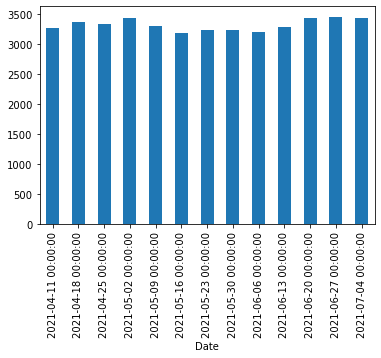

In [11]:
%matplotlib inline
df1.Close.resample("W").mean().plot(kind ='bar')

## 2. DateRange and Holiday

In [12]:
df2 = pd.read_csv("AMZN_no_dates.csv")
df2.head()

,Open,High,Low,Close,Adj Close,Volume
0,3173.000000,3235.959961,3161.239990,3226.729980,3226.729980,3334900
1,3223.750000,3247.310059,3217.040039,3223.820068,3223.820068,2537800
2,3233.800049,3303.610107,3223.649902,3279.389893,3279.389893,3346200
3,3310.899902,3324.500000,3292.000000,3299.300049,3299.300049,2812100
4,3304.699951,3372.199951,3288.899902,3372.199951,3372.199951,4341500


In [13]:
len(df2)

63

In [14]:
rng = pd.date_range(start = '4/5/2021', end = '7/1/2021', freq = 'B')
print(rng)
len(rng) # --> records = 64. start to end = 63

DatetimeIndex(['2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16', '2021-04-19', '2021-04-20',
               '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-26',
               '2021-04-27', '2021-04-28', '2021-04-29', '2021-04-30',
               '2021-05-03', '2021-05-04', '2021-05-05', '2021-05-06',
               '2021-05-07', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-24',
               '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
               '2021-05-31', '2021-06-01', '2021-06-02', '2021-06-03',
               '2021-06-04', '2021-06-07', '2021-06-08', '2021-06-09',
               '2021-06-10', '2021-06-11', '2021-06-14', '2021-06-15',
               '2021-06-16', '2021-06-17', '2021-06-18', '2021-06-21',
      

64

In [15]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
dates = pd.DataFrame({'date':pd.date_range('2021-04-05', '2021-07-01')})
us_cal = CustomBusinessDay(calendar=USFederalHolidayCalendar())
rng = pd.date_range(start = '4/5/2021', end = '7/1/2021', freq=us_cal)
print(rng)
print('records of this data is: ', len(rng))

DatetimeIndex(['2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16', '2021-04-19', '2021-04-20',
               '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-26',
               '2021-04-27', '2021-04-28', '2021-04-29', '2021-04-30',
               '2021-05-03', '2021-05-04', '2021-05-05', '2021-05-06',
               '2021-05-07', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-24',
               '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
               '2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10',
               '2021-06-11', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-18', '2021-06-21', '2021-06-22',
      

In [16]:
df2.set_index(rng, inplace = True)
df2.head()

,Open,High,Low,Close,Adj Close,Volume
2021-04-05,3173.000000,3235.959961,3161.239990,3226.729980,3226.729980,3334900
2021-04-06,3223.750000,3247.310059,3217.040039,3223.820068,3223.820068,2537800
2021-04-07,3233.800049,3303.610107,3223.649902,3279.389893,3279.389893,3346200
2021-04-08,3310.899902,3324.500000,3292.000000,3299.300049,3299.300049,2812100
2021-04-09,3304.699951,3372.199951,3288.899902,3372.199951,3372.199951,4341500


In [17]:
df2.index

DatetimeIndex(['2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16', '2021-04-19', '2021-04-20',
               '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-26',
               '2021-04-27', '2021-04-28', '2021-04-29', '2021-04-30',
               '2021-05-03', '2021-05-04', '2021-05-05', '2021-05-06',
               '2021-05-07', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-24',
               '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
               '2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10',
               '2021-06-11', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-18', '2021-06-21', '2021-06-22',
      

## 3. to_datetime function

In [18]:
dates = ['2021-07-07', '07/07/2021', '2021/07/07', 'July 7, 2021', '2021.07.07', '20210707']
pd.to_datetime(dates)

DatetimeIndex(['2021-07-07', '2021-07-07', '2021-07-07', '2021-07-07',
               '2021-07-07', '2021-07-07'],
              dtype='datetime64[ns]', freq=None)

In [19]:
dates = ['2021-07-07 4:30:00 PM', '07/07/2021', '2021/07/07 16:30:00', 'July 7, 2021', '2021.07.07', '20210707']
pd.to_datetime(dates)

DatetimeIndex(['2021-07-07 16:30:00', '2021-07-07 00:00:00',
               '2021-07-07 16:30:00', '2021-07-07 00:00:00',
               '2021-07-07 00:00:00', '2021-07-07 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [25]:
pd.to_datetime('09-07-2021', dayfirst = True)

Timestamp('2021-07-09 00:00:00')

In [27]:
pd.to_datetime('09-07-2021')

Timestamp('2021-09-07 00:00:00')

In [23]:
pd.to_datetime(['2021–07–08', 'July 9, 2021', 'xyz'], errors='ignore')

Index(['2021–07–08', 'July 9, 2021', 'xyz'], dtype='object')

In [28]:
pd.to_datetime(['2021–07–08', 'July 9, 2021', 'xyz'], errors='coerce')

DatetimeIndex(['NaT', '2021-07-09', 'NaT'], dtype='datetime64[ns]', freq=None)

## 4. Period and PeriodIndex

In [30]:
y = pd.Period('2021')
y

Period('2021', 'A-DEC')

In [31]:
y.start_time

Timestamp('2021-01-01 00:00:00')

In [32]:
y.end_time

Timestamp('2021-12-31 23:59:59.999999999')

In [34]:
m = pd.Period('2021-7', freq='M')
m

Period('2021-07', 'M')

In [35]:
m+1

Period('2021-08', 'M')

In [36]:
h = pd.Period('2021-7-7 23:51:00', freq='H')
h

Period('2021-07-07 23:00', 'H')

In [37]:
q = pd.Period('2021Q4', freq='Q-MAR')
q

Period('2021Q4', 'Q-MAR')

In [38]:
q.asfreq('M',how='start')

Period('2021-01', 'M')

In [39]:
q.asfreq('M',how='end')

Period('2021-03', 'M')

In [40]:
idx = pd.period_range('2017', '2021', freq='Q')
idx

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2',
             '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4',
             '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [41]:
idx[0].start_time
idx[0].end_time

Timestamp('2017-03-31 23:59:59.999999999')

### A Brief Example of Fiscal Year Ends in January

In [42]:
idx = pd.period_range('2017', '2021', freq='Q-JAN')
idx

PeriodIndex(['2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1',
             '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3',
             '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4'],
            dtype='period[Q-JAN]', freq='Q-JAN')

In [43]:
idx = pd.period_range('2017', periods=10, freq='Q-JAN')
idx

PeriodIndex(['2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1',
             '2019Q2', '2019Q3', '2019Q4', '2020Q1'],
            dtype='period[Q-JAN]', freq='Q-JAN')

### A Simple Example of Processing Walmart's Financial

In [69]:
df = pd.read_csv('wmt.csv')
df

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [70]:
df.set_index('Line Item', inplace = True)
df

,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
Line Item,,,,,
Revenue,115904,120854,118179,130936,117542
Expenses,86544,89485,87484,97743,87688
Profit,29360,31369,30695,33193,29854


In [71]:
df = df.T
df

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [72]:
df.index

Index(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='object')

In [74]:
#convert object to period index
df.index = pd.PeriodIndex(df.index, freq = 'Q-JAN')
df.index

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-JAN]', freq='Q-JAN')

In [75]:
df['start date'] = df.index.map(lambda x: x.start_time)
df

Line Item,Revenue,Expenses,Profit,start date
2017Q1,115904,86544,29360,2016-02-01
2017Q2,120854,89485,31369,2016-05-01
2017Q3,118179,87484,30695,2016-08-01
2017Q4,130936,97743,33193,2016-11-01
2018Q1,117542,87688,29854,2017-02-01


In [76]:
df['end date'] = df.index.map(lambda x: x.end_time)
df

Line Item,Revenue,Expenses,Profit,start date,end date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30 23:59:59.999999999
2017Q2,120854,89485,31369,2016-05-01,2016-07-31 23:59:59.999999999
2017Q3,118179,87484,30695,2016-08-01,2016-10-31 23:59:59.999999999
2017Q4,130936,97743,33193,2016-11-01,2017-01-31 23:59:59.999999999
2018Q1,117542,87688,29854,2017-02-01,2017-04-30 23:59:59.999999999
